In [5]:
from load_modules import * 
from sklearn.decomposition import PCA

In [6]:
file_location = "../../data/Raman_Mouse/noise_removed_raw/"
filenames = [f for f in glob.glob(file_location +'/*.txt') if "metadata" not in f]
filenames = sorted(filenames)
data = load_files([filenames], True)

# file_location2 = "../../data/Raman_Mouse/noise_removed FWHM7/"
# filenames2 = [f for f in glob.glob(file_location2 +'/*.txt') if "metadata" not in f]
# filenames2 = sorted(filenames2)
# data2 = load_files([filenames2], True)

# file_location3 = "../../data/Raman_Mouse/noise_removed_percentage_010/"
# filenames3 = [f for f in glob.glob(file_location3+'/*.txt') if "metadata" not in f]
# filenames3 = sorted(filenames3)
# data3 = load_files([filenames3], True)

# file_location4 = "../../data/Raman_Mouse/noise_removed_k_10_percentage/"
# filenames4 = [f for f in glob.glob(file_location4 +'/*.txt') if "metadata" not in f]
# filenames4 = sorted(filenames4)
# data4 = load_files([filenames4], True)

start loading data, number of files 51
opening file 1 of 51: ../../data/Raman_Mouse/noise_removed_raw/Kidney_map_150z25_60s_#35.txt
loaded  file 1 of 51: ../../data/Raman_Mouse/noise_removed_raw/Kidney_map_150z25_60s_#35.txt
opening file 2 of 51: ../../data/Raman_Mouse/noise_removed_raw/Kidney_map_150z25_60s_#36.txt
loaded  file 2 of 51: ../../data/Raman_Mouse/noise_removed_raw/Kidney_map_150z25_60s_#36.txt
opening file 3 of 51: ../../data/Raman_Mouse/noise_removed_raw/Kidney_map_150z25_60s_#37.txt
loaded  file 3 of 51: ../../data/Raman_Mouse/noise_removed_raw/Kidney_map_150z25_60s_#37.txt
opening file 4 of 51: ../../data/Raman_Mouse/noise_removed_raw/Kidney_map_150z25_60s_#38.txt
loaded  file 4 of 51: ../../data/Raman_Mouse/noise_removed_raw/Kidney_map_150z25_60s_#38.txt
opening file 5 of 51: ../../data/Raman_Mouse/noise_removed_raw/Kidney_map_150z25_60s_#39.txt
loaded  file 5 of 51: ../../data/Raman_Mouse/noise_removed_raw/Kidney_map_150z25_60s_#39.txt
opening file 6 of 51: ../../dat

opening file 45 of 51: ../../data/Raman_Mouse/noise_removed_raw/Muscle_map_150z25_60s_#28.txt
loaded  file 45 of 51: ../../data/Raman_Mouse/noise_removed_raw/Muscle_map_150z25_60s_#28.txt
opening file 46 of 51: ../../data/Raman_Mouse/noise_removed_raw/Muscle_map_150z25_60s_#29.txt
loaded  file 46 of 51: ../../data/Raman_Mouse/noise_removed_raw/Muscle_map_150z25_60s_#29.txt
opening file 47 of 51: ../../data/Raman_Mouse/noise_removed_raw/Muscle_map_150z25_60s_#30.txt
loaded  file 47 of 51: ../../data/Raman_Mouse/noise_removed_raw/Muscle_map_150z25_60s_#30.txt
opening file 48 of 51: ../../data/Raman_Mouse/noise_removed_raw/Muscle_map_150z25_60s_#31.txt
loaded  file 48 of 51: ../../data/Raman_Mouse/noise_removed_raw/Muscle_map_150z25_60s_#31.txt
opening file 49 of 51: ../../data/Raman_Mouse/noise_removed_raw/Muscle_map_150z25_60s_#32.txt
loaded  file 49 of 51: ../../data/Raman_Mouse/noise_removed_raw/Muscle_map_150z25_60s_#32.txt
opening file 50 of 51: ../../data/Raman_Mouse/noise_removed_

In [44]:
def __LPF_auto__(x, min_FWHM):
    gradient_width = 10
    max_spike_width = 100
    k = int(2.674 * (wavenumbers[-1] - wavenumbers[0]) / (np.pi*min_FWHM))
    # find spike that are to similar to a dirac delta function
    spike = np.zeros(x.shape)
    if not gradient_width is None:
        grad = np.abs(x[:,gradient_width:] - x[:,:-gradient_width])
        std_grad = np.std(grad, 1)
        for i in range(x.shape[0]):
            position, details = signal.find_peaks(x[i], rel_height=.7, prominence=std_grad[i]*3, width=(None,max_spike_width))
            for j,p in enumerate(position):
                half_w = int(details['widths'][j]//2)
                left, right = max(0, p-half_w), min(p+half_w, x.shape[1]-1)
                base = np.linspace(x[i,left], x[i,right], right-left+1)
                spike[i,left:right+1] = x[i,left:right+1] - base

    # LPF
    cosine = dct(x-spike, type=2, norm='backward')
    cosine = cosine.T
    cosine[k:] = np.mean(cosine[k:], 0)

    return dct(cosine.T, type=3, norm="forward")+spike

In [41]:
x_new = data[0][30].reshape(-1,data[0][0].shape[-1])

pca = PCA(svd_solver='full')
pca.fit(x_new)

components_ = copy.copy(pca.components_)
pca_space = pca.transform(x_new)

lst2 = []
for i in range(1,1000,5):
    pca.components_ = components_[:i]
    x_pca = pca.inverse_transform(pca_space[:,:i])
    lst2.append((error.MAPE(x_new, x_pca), error.MSE(x_new, x_pca), error.RMSPE(x_new, x_pca)))


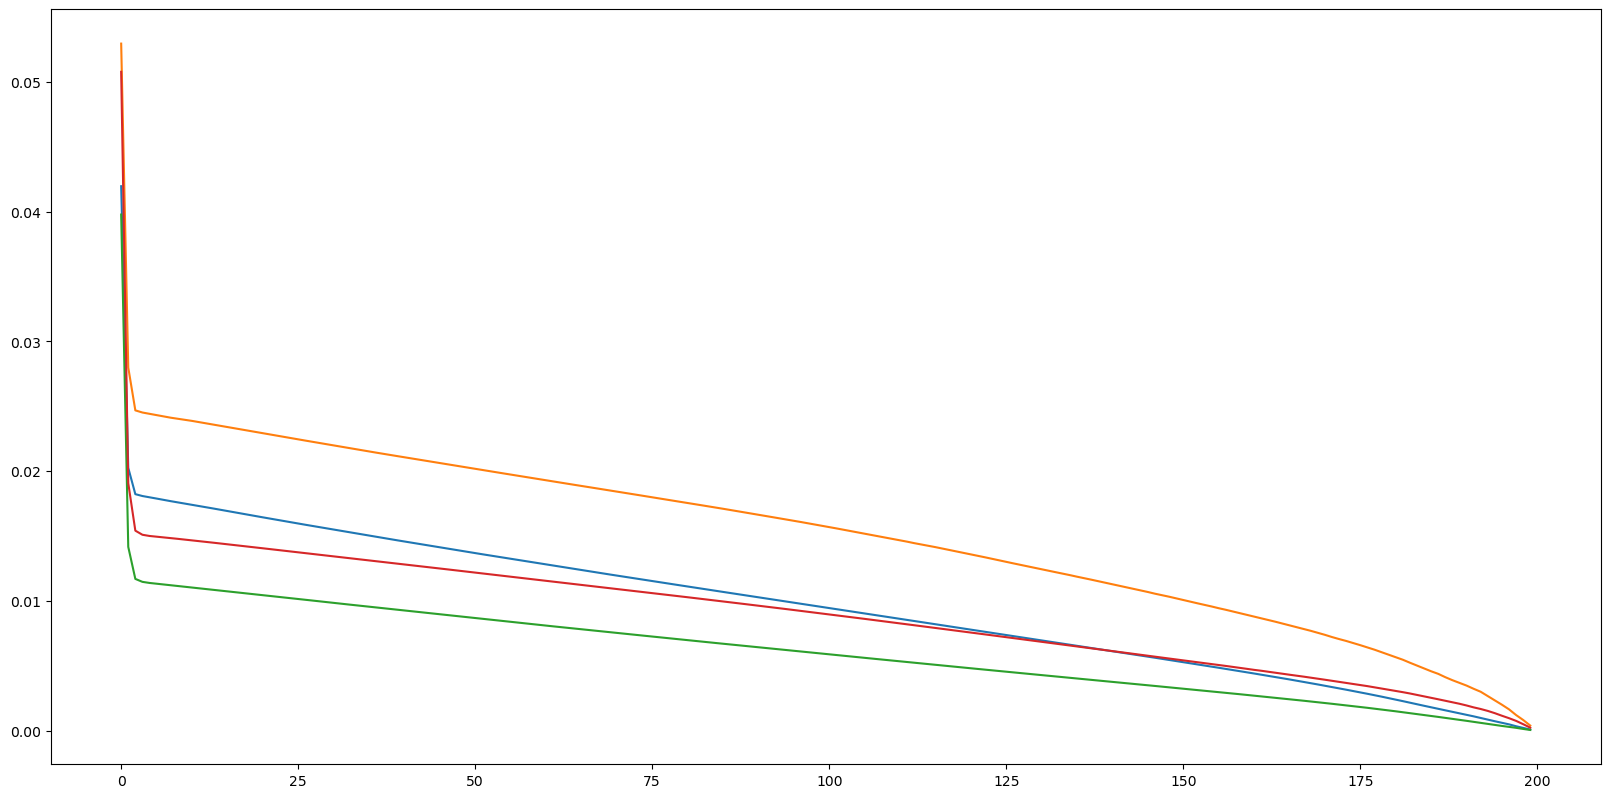

In [42]:
lst2 = np.array(lst2)
plt.plot(lst[:,0])
plt.plot(lst[:,2])
plt.plot(lst2[:,0])
plt.plot(lst2[:,2])

In [81]:
img, wavenumbers = data[0][0], data[1][0]


In [82]:
def MAPE(x, y):
    return np.mean(np.abs(1 - y/x))

lst = []
for i in range(51):
    best = (0,0,0)
    for x in range(150):
        for y in range(25):
            if (new:=MAPE(data[0][i][x,y], data4[0][i][x,y])-MAPE(data[0][i][x,y], data2[0][i][x,y])) > best[2]:
                best = (x,y,new)
    print(f"{MAPE(data[0][i], data2[0][i])}\t{MAPE(data[0][i], data4[0][i])}\t{MAPE(data[0][i], data4[0][i])-MAPE(data[0][i], data2[0][i])}\t{best}\t{filenames[i]}")
    lst.append(MAPE(data[0][i], data2[0][i]))
np.mean(lst)

0.014605261385440826	0.015973379835486412	0.0013681184500455856	(61, 1, 0.003401652)	../../data/Raman_Mouse/noise_removed_raw\Kidney_map_150z25_60s_#35.txt
0.015935176983475685	0.017545869573950768	0.0016106925904750824	(49, 24, 0.0028653275)	../../data/Raman_Mouse/noise_removed_raw\Kidney_map_150z25_60s_#36.txt
0.013024890795350075	0.014170895330607891	0.0011460045352578163	(120, 11, 0.002192716)	../../data/Raman_Mouse/noise_removed_raw\Kidney_map_150z25_60s_#37.txt
0.018105152994394302	0.01997017115354538	0.0018650181591510773	(3, 5, 0.0032100864)	../../data/Raman_Mouse/noise_removed_raw\Kidney_map_150z25_60s_#38.txt
0.013665547594428062	0.015015327371656895	0.0013497797772288322	(89, 18, 0.0036831927)	../../data/Raman_Mouse/noise_removed_raw\Kidney_map_150z25_60s_#39.txt
0.012308008968830109	0.01327671017497778	0.0009687012061476707	(55, 18, 0.001868167)	../../data/Raman_Mouse/noise_removed_raw\Kidney_map_150z25_60s_#40.txt
0.012836421839892864	0.0141567662358284	0.00132034439593553

0.014944237

Possible candidates:

to much smoothing:
 (0.02242749,
  '../../data/Raman_Mouse/noise_removed_raw/Muscle_map_150z25_60s_#20.txt'),
 (0.022213018,
  '../../data/Raman_Mouse/noise_removed_raw/Muscle_map_150z25_60s_#21.txt'),
 (0.023439936,
  '../../data/Raman_Mouse/noise_removed_raw/Muscle_map_150z25_60s_#22.txt'),

to little:

 (0.009440947,
  '../../data/Raman_Mouse/noise_removed_raw/Liver_map_150z25_60s_#17.txt'),
 (0.009032733,
  '../../data/Raman_Mouse/noise_removed_raw/Liver_map_150z25_60s_#2.txt'),
 (0.009967769,
  '../../data/Raman_Mouse/noise_removed_raw/Liver_map_150z25_60s_#6.txt'),

../../data/Raman_Mouse/noise_removed_raw\Muscle_map_150z25_60s_#32.txt
0.021012774 0.010008177 0.023044897


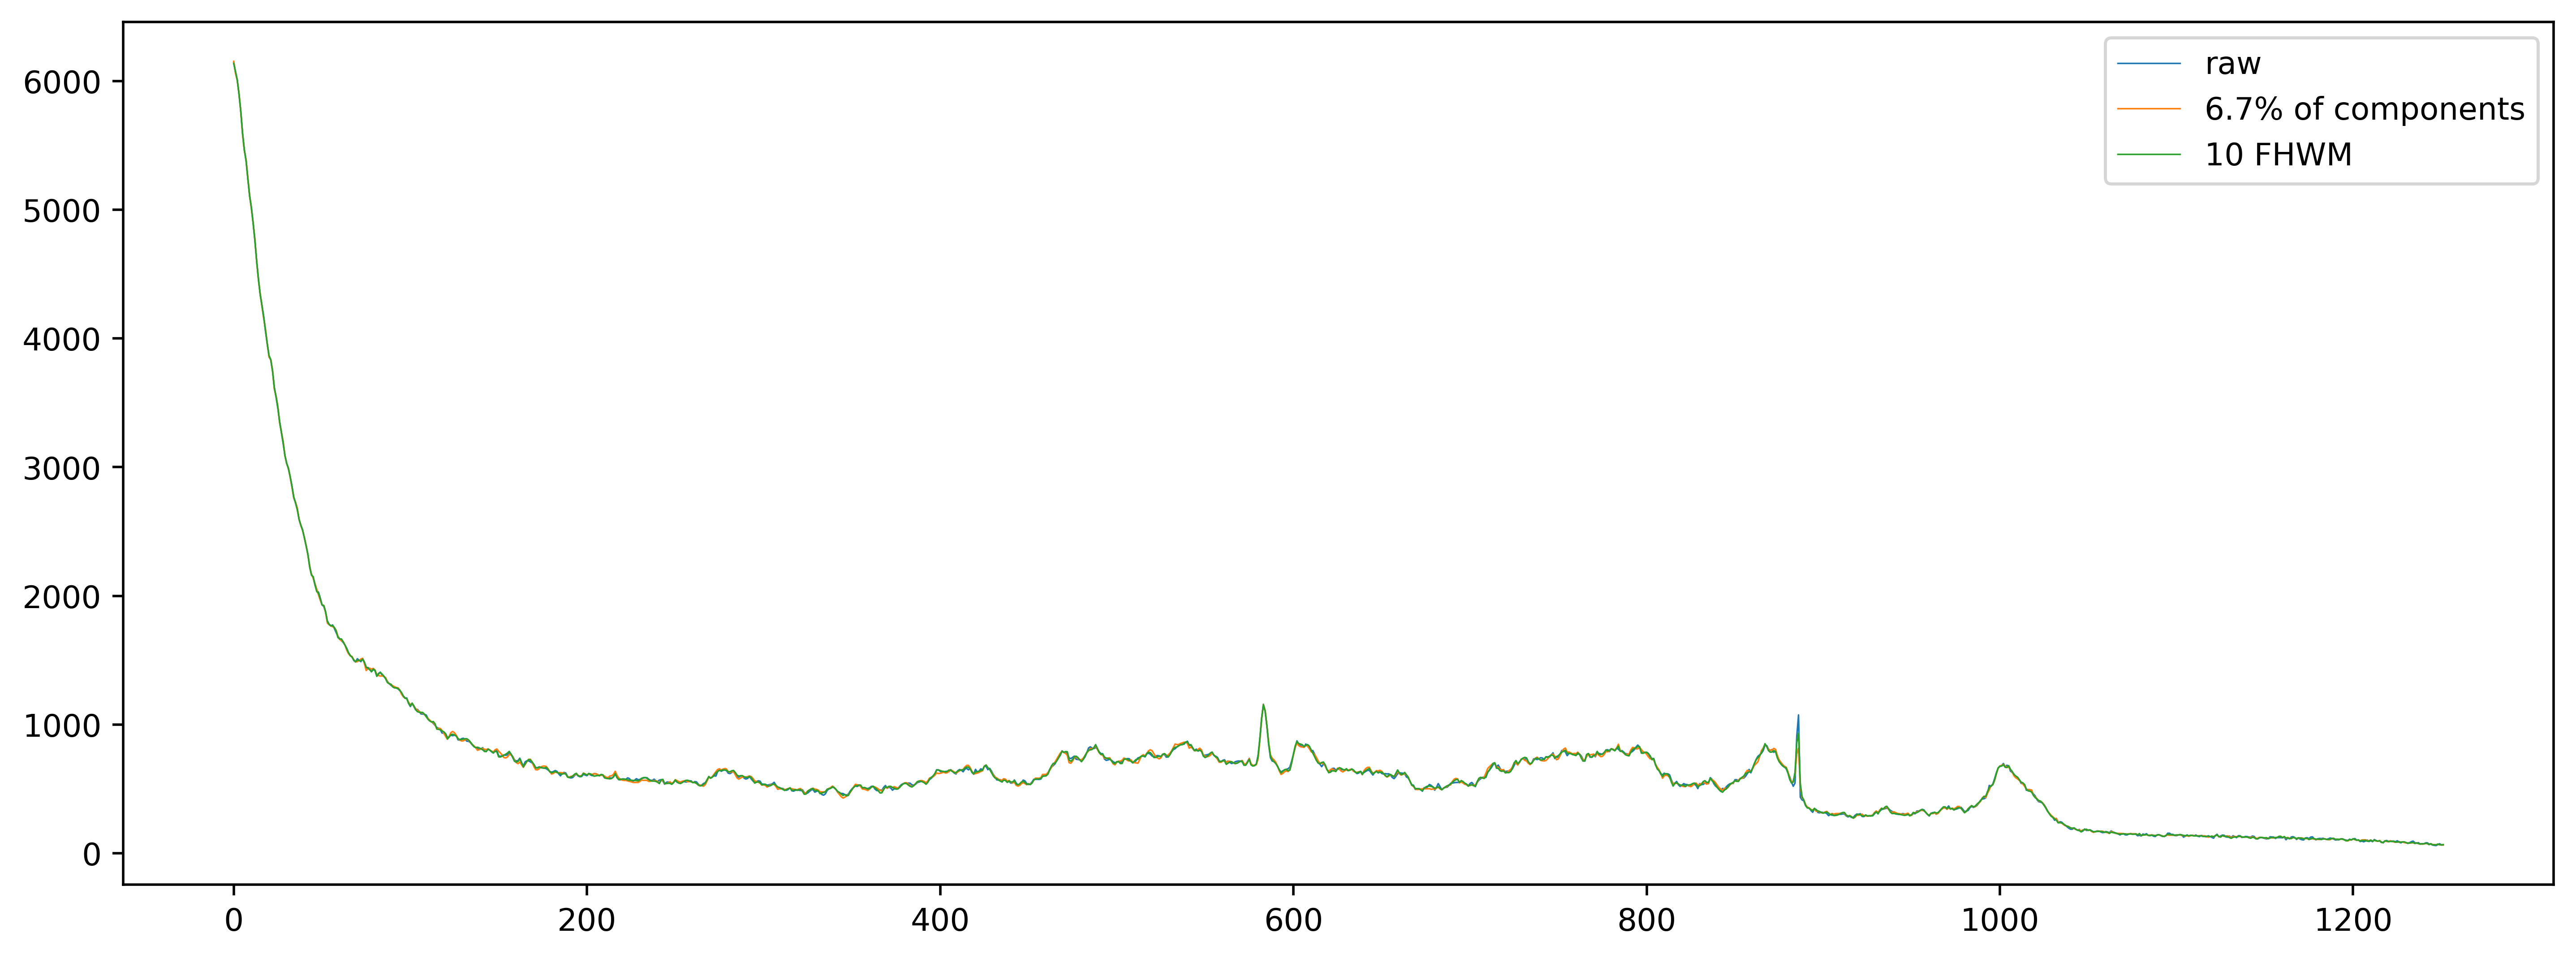

In [84]:
plt.rcParams['figure.figsize'] = (14.0, 5.0)
plt.rcParams['figure.dpi'] = 500
plt.rcParams['lines.linewidth'] = 0.5

# for i in range(51):
#     x,y = 0, 0
#     print(filenames[i])
#     print(MAPE(data[0][i], data2[0][i]), MAPE(data[0][i], data3[0][i]), MAPE(data[0][i], data4[0][i]))
#     plt.plot(data[0][i][x,y], label="raw")
#     plt.plot(data4[0][i][x,y], label="6.7% of components")
#     plt.plot(data2[0][i][x,y], label="10 FHWM")
#     plt.plot(data3[0][i][x,y], label="1.5 percentage")
#     plt.legend()
#     plt.show()

for i in range(51):
    if "#32" in filenames[i]:
        x,y =72, 22
        print(filenames[i])
        print(MAPE(data[0][i], data2[0][i]), MAPE(data[0][i], data3[0][i]), MAPE(data[0][i], data4[0][i]))
        plt.plot(data[0][i][x,y], label="raw")
        plt.plot(data4[0][i][x,y], label="6.7% of components")
        plt.plot(data2[0][i][x,y], label="10 FHWM")
#         plt.plot(data3[0][i][x,y], label="1.5 percentage")
        plt.legend()
        plt.show()
        
# for i in range(51):
#     if "#25" in filenames[i]:
#         x,y = 81, 0
#         print(filenames[i])
#         print(MAPE(data[0][i], data2[0][i]), MAPE(data[0][i], data3[0][i]), MAPE(data[0][i], data4[0][i]))
#         plt.plot(data[0][i][x,y], label="raw")
#         plt.plot(data4[0][i][x,y], label="6.7% of components")
#         plt.plot(data2[0][i][x,y], label="10 FHWM")
# #         plt.plot(data3[0][i][x,y], label="1.5 percentage")
#         plt.legend()
#         plt.show()